# Tugas Adult Dataset

### 1. Deskriptif Analisis

In [1]:
#Import Library yang dibutuhkan
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Allow charts to apper in the notebook
%matplotlib inline

In [2]:
# Function of MySQL

host = '127.0.0.1'
port = "3306"
user = 'root'
password = ''
database = 'db_gdelt_project'

conn = pymysql.connect(
    host=host,
    port=int(port),
    user=user,
    passwd=password,
    db=database,
    charset='utf8mb4')

def run(sql):
    df = pd.read_sql_query(sql,conn)
    return df

In [3]:
#testing
test = run("select * from gdelt_adult limit 10")
test

id  age         workclass  fnlwgt     education education-num  \
0   1   50  Self-emp-not-inc   83311     Bachelors            13   
1   2   38           Private  215646       HS-grad             9   
2   3   53           Private  234721          11th             7   
3   4   28           Private  338409     Bachelors            13   
4   5   37           Private  284582       Masters            14   
5   6   49           Private  160187           9th             5   
6   7   52  Self-emp-not-inc  209642       HS-grad             9   
7   8   31           Private   45781       Masters            14   
8   9   42           Private  159449     Bachelors            13   
9  10   37           Private  280464  Some-college            10   

          marital-status         occupation   relationship   race     sex  \
0     Married-civ-spouse    Exec-managerial        Husband  White    Male   
1               Divorced  Handlers-cleaners  Not-in-family  White    Male   
2     Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3     Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4     Married-civ-spouse    Exec-managerial           Wife  White  Female   
5  Married-spouse-absent      Other-service  Not-in-family  Black  Female   
6     Married-civ-spouse    Exec-managerial        Husband  White    Male   
7          Never-married     Prof-specialty  Not-in-family  White  Female   
8     Married-civ-spouse    Exec-managerial        Husband  White    Male   
9     Married-civ-spouse    Exec-managerial        Husband  Black    Male   

  capital-gain capital-loss hours-per-week native-country   wage  n_wage  
0            0            0             13  United-States  <=50K       0  
1            0            0             40  United-States  <=50K       0  
2            0            0             40  United-States  <=50K       0  
3            0            0             40           Cuba  <=50K       0  
4            0            0             40  United-States  <=50K       0  
5            0            0             16        Jamaica  <=50K       0  
6            0            0             45  United-States   >50K       1  
7        14084            0             50  United-States   >50K       1  
8         5178            0             40  United-States   >50K       1  
9            0            0             80  United-States   >50K       1

In [4]:
# Replcaye
all_data = run("select * from gdelt_adult")

In [5]:
all_data.isnull().sum()
all_data.dropna()

id  age         workclass  fnlwgt     education education-num  \
0          1   50  Self-emp-not-inc   83311     Bachelors            13   
1          2   38           Private  215646       HS-grad             9   
2          3   53           Private  234721          11th             7   
3          4   28           Private  338409     Bachelors            13   
4          5   37           Private  284582       Masters            14   
5          6   49           Private  160187           9th             5   
6          7   52  Self-emp-not-inc  209642       HS-grad             9   
7          8   31           Private   45781       Masters            14   
8          9   42           Private  159449     Bachelors            13   
9         10   37           Private  280464  Some-college            10   
10        11   30         State-gov  141297     Bachelors            13   
11        12   23           Private  122272     Bachelors            13   
12        13   32           Private  205019    Assoc-acdm            12   
13        14   40           Private  121772     Assoc-voc            11   
14        15   34           Private  245487       7th-8th             4   
15        16   25  Self-emp-not-inc  176756       HS-grad             9   
16        17   32           Private  186824       HS-grad             9   
17        18   38           Private   28887          11th             7   
18        19   43  Self-emp-not-inc  292175       Masters            14   
19        20   40           Private  193524     Doctorate            16   
20        21   54           Private  302146       HS-grad             9   
21        22   35       Federal-gov   76845           9th             5   
22        23   43           Private  117037          11th             7   
23        24   59           Private  109015       HS-grad             9   
24        25   56         Local-gov  216851     Bachelors            13   
25        26   19           Private  168294       HS-grad             9   
26        27   54                 ?  180211  Some-college            10   
27        28   39           Private  367260       HS-grad             9   
28        29   49           Private  193366       HS-grad             9   
29        30   23         Local-gov  190709    Assoc-acdm            12   
...      ...  ...               ...     ...           ...           ...   
32530  32531   30                 ?   33811     Bachelors            13   
32531  32532   34           Private  204461     Doctorate            16   
32532  32533   54           Private  337992     Bachelors            13   
32533  32534   37           Private  179137  Some-college            10   
32534  32535   22           Private  325033          12th             8   
32535  32536   34           Private  160216     Bachelors            13   
32536  32537   30           Private  345898       HS-grad             9   
32537  32538   38           Private  139180     Bachelors            13   
32538  32539   71                 ?  287372     Doctorate            16   
32539  32540   45         State-gov  252208       HS-grad             9   
32540  32541   41                 ?  202822       HS-grad             9   
32541  32542   72                 ?  129912       HS-grad             9   
32542  32543   45         Local-gov  119199    Assoc-acdm            12   
32543  32544   31           Private  199655       Masters            14   
32544  32545   39         Local-gov  111499    Assoc-acdm            12   
32545  32546   37           Private  198216    Assoc-acdm            12   
32546  32547   43           Private  260761       HS-grad             9   
32547  32548   65  Self-emp-not-inc   99359   Prof-school            15   
32548  32549   43         State-gov  255835  Some-college            10   
32549  32550   43  Self-emp-not-inc   27242  Some-college            10   
32550  32551   32           Private   34066          10th             6   
32551  32552   43           Private

In [15]:
import matplotlib.pyplot as plt

In [10]:
wage={'<=50K':0,'>50K':1}
all_data['wage']=all_data['wage'].map(wage).astype(int)
all_data['wage']

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [33]:
all_data[['age','n_wage']].groupby(('age')).mean()

n_wage
age           
17.0  0.000000
18.0  0.000000
19.0  0.002809
20.0  0.000000
21.0  0.004167
22.0  0.016993
23.0  0.013683
24.0  0.038847
25.0  0.063020
26.0  0.080255
27.0  0.097006
28.0  0.137255
29.0  0.164822
30.0  0.198606
31.0  0.206081
32.0  0.228261
33.0  0.218286
34.0  0.274266
35.0  0.247717
36.0  0.292873
37.0  0.340326
38.0  0.340992
39.0  0.341104
40.0  0.337531
41.0  0.345297
42.0  0.346154
43.0  0.354545
44.0  0.388122
45.0  0.392371
46.0  0.396201
...        ...
60.0  0.323718
61.0  0.320000
62.0  0.259690
63.0  0.256522
64.0  0.254808
65.0  0.241573
66.0  0.233333
67.0  0.245033
68.0  0.225000
69.0  0.194444
70.0  0.213483
71.0  0.222222
72.0  0.134328
73.0  0.156250
74.0  0.235294
75.0  0.155556
76.0  0.108696
77.0  0.172414
78.0  0.217391
79.0  0.409091
80.0  0.090909
81.0  0.150000
82.0  0.000000
83.0  0.333333
84.0  0.100000
85.0  0.000000
86.0  0.000000
87.0  0.000000
88.0  0.000000
90.0  0.186047

[73 rows x 1 columns]

In [34]:
all_data[['race','n_wage']].groupby(('race')).mean()

n_wage
race                        
                         NaN
Amer-Indian-Eskimo  0.115756
Asian-Pac-Islander  0.265640
Black               0.123880
Other               0.092251
White               0.255869

In [40]:
all_data[['education','n_wage']].groupby(('education')).mean().sort_values(by='n_wage',ascending=False)

n_wage
education             
Doctorate     0.740920
Prof-school   0.734375
Masters       0.556587
Bachelors     0.414830
Assoc-voc     0.261216
Assoc-acdm    0.248360
Some-college  0.190235
HS-grad       0.159509
12th          0.076212
10th          0.066452
7th-8th       0.061920
9th           0.052529
11th          0.051064
5th-6th       0.048048
1st-4th       0.035714
Preschool     0.000000
                   NaN

In [41]:
all_data[['relationship','n_wage']].groupby(('relationship')).mean().sort_values(by='n_wage',ascending=False)

n_wage
relationship            
Wife            0.475128
Husband         0.448571
Not-in-family   0.103083
Unmarried       0.063262
Other-relative  0.037717
Own-child       0.013220
                     NaN

In [42]:

all_data[['hours-per-week','n_wage']].groupby(('hours-per-week')).mean().sort_values(by='n_wage',ascending=False)

n_wage
hours-per-week          
61              1.000000
67              0.750000
76              0.666667
97              0.500000
95              0.500000
89              0.500000
73              0.500000
55              0.465418
50              0.452643
60              0.439322
80              0.428571
65              0.426230
68              0.416667
56              0.412371
57              0.411765
59              0.400000
84              0.377778
45              0.375548
70              0.364261
64              0.357143
72              0.352113
44              0.349057
52              0.347826
90              0.344828
54              0.341463
46              0.341463
58              0.321429
42              0.319635
85              0.307692
47              0.306122
...                  ...
30              0.072237
10              0.071942
34              0.071429
12              0.069364
20              0.063725
16              0.063415
14              0.058824
28              0.058140
9               0.055556
4               0.055556
25              0.051929
15              0.037129
17              0.034483
27              0.033333
3               0.025641
31              0.000000
11              0.000000
94              0.000000
92              0.000000
91              0.000000
74              0.000000
81              0.000000
19              0.000000
88              0.000000
87              0.000000
86              0.000000
77              0.000000
82              0.000000
23              0.000000
                     NaN

[95 rows x 1 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [49]:
#encoding Education
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 4] = lable_encoder.fit_transform(all_data.iloc[:, 4])
print(lable_encoder.classes_)

['' '10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


0        10
1        12
2         2
3        10
4        13
5         7
6        12
7        13
8        10
9        16
10       10
11       10
12        8
13        9
14        6
15       12
16       12
17        2
18       13
19       11
20       12
21        7
22        2
23       12
24       10
25       12
26       16
27       12
28       12
29        8
         ..
32531    11
32532    10
32533    16
32534     3
32535    10
32536    12
32537    10
32538    11
32539    12
32540    12
32541    12
32542     8
32543    13
32544     8
32545     8
32546    12
32547    15
32548    16
32549    16
32550     1
32551     9
32552    13
32553    13
32554    16
32555     8
32556    12
32557    12
32558    12
32559    12
32560     0
Name: education, Length: 32561, dtype: int64

In [50]:
temp

id   age         workclass  fnlwgt  education education-num  \
0          1  50.0  Self-emp-not-inc   83311         10            13   
1          2  38.0           Private  215646         12             9   
2          3  53.0           Private  234721          2             7   
3          4  28.0           Private  338409         10            13   
4          5  37.0           Private  284582         13            14   
5          6  49.0           Private  160187          7             5   
6          7  52.0  Self-emp-not-inc  209642         12             9   
7          8  31.0           Private   45781         13            14   
8          9  42.0           Private  159449         10            13   
9         10  37.0           Private  280464         16            10   
10        11  30.0         State-gov  141297         10            13   
11        12  23.0           Private  122272         10            13   
12        13  32.0           Private  205019          8            12   
13        14  40.0           Private  121772          9            11   
14        15  34.0           Private  245487          6             4   
15        16  25.0  Self-emp-not-inc  176756         12             9   
16        17  32.0           Private  186824         12             9   
17        18  38.0           Private   28887          2             7   
18        19  43.0  Self-emp-not-inc  292175         13            14   
19        20  40.0           Private  193524         11            16   
20        21  54.0           Private  302146         12             9   
21        22  35.0       Federal-gov   76845          7             5   
22        23  43.0           Private  117037          2             7   
23        24  59.0           Private  109015         12             9   
24        25  56.0         Local-gov  216851         10            13   
25        26  19.0           Private  168294         12             9   
26        27  54.0                 ?  180211         16            10   
27        28  39.0           Private  367260         12             9   
28        29  49.0           Private  193366         12             9   
29        30  23.0         Local-gov  190709          8            12   
...      ...   ...               ...     ...        ...           ...   
32531  32532  34.0           Private  204461         11            16   
32532  32533  54.0           Private  337992         10            13   
32533  32534  37.0           Private  179137         16            10   
32534  32535  22.0           Private  325033          3             8   
32535  32536  34.0           Private  160216         10            13   
32536  32537  30.0           Private  345898         12             9   
32537  32538  38.0           Private  139180         10            13   
32538  32539  71.0                 ?  287372         11            16   
32539  32540  45.0         State-gov  252208         12             9   
32540  32541  41.0                 ?  202822         12             9   
32541  32542  72.0                 ?  129912         12             9   
32542  32543  45.0         Local-gov  119199          8            12   
32543  32544  31.0           Private  199655         13            14   
32544  32545  39.0         Local-gov  111499          8            12   
32545  32546  37.0           Private  198216          8            12   
32546  32547  43.0           Private  260761         12             9   
32547  32548  65.0  Self-emp-not-inc   99359         15            15   
32548  32549  43.0         State-gov  255835         16            10   
32549  32550  43.0  Self-emp-not-inc   27242         16            10   
32550  32551  32.0           Private   34066          1             6   
32551  32552  43.0           Private   84661          9            11   
32552  32553  32.0           Private  116138         13            14   
32553  32554  53.0           Private  321865         13            1

In [63]:
# Labeling workclass
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[''] = lable_encoder.fit_transform(all_data.iloc[:, 2])
print(lable_encoder.classes_)

['' '?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


id   age  workclass  fnlwgt     education education-num  \
0          1  50.0          7   83311     Bachelors            13   
1          2  38.0          5  215646       HS-grad             9   
2          3  53.0          5  234721          11th             7   
3          4  28.0          5  338409     Bachelors            13   
4          5  37.0          5  284582       Masters            14   
5          6  49.0          5  160187           9th             5   
6          7  52.0          7  209642       HS-grad             9   
7          8  31.0          5   45781       Masters            14   
8          9  42.0          5  159449     Bachelors            13   
9         10  37.0          5  280464  Some-college            10   
10        11  30.0          8  141297     Bachelors            13   
11        12  23.0          5  122272     Bachelors            13   
12        13  32.0          5  205019    Assoc-acdm            12   
13        14  40.0          5  121772     Assoc-voc            11   
14        15  34.0          5  245487       7th-8th             4   
15        16  25.0          7  176756       HS-grad             9   
16        17  32.0          5  186824       HS-grad             9   
17        18  38.0          5   28887          11th             7   
18        19  43.0          7  292175       Masters            14   
19        20  40.0          5  193524     Doctorate            16   
20        21  54.0          5  302146       HS-grad             9   
21        22  35.0          2   76845           9th             5   
22        23  43.0          5  117037          11th             7   
23        24  59.0          5  109015       HS-grad             9   
24        25  56.0          3  216851     Bachelors            13   
25        26  19.0          5  168294       HS-grad             9   
26        27  54.0          1  180211  Some-college            10   
27        28  39.0          5  367260       HS-grad             9   
28        29  49.0          5  193366       HS-grad             9   
29        30  23.0          3  190709    Assoc-acdm            12   
...      ...   ...        ...     ...           ...           ...   
32531  32532  34.0          5  204461     Doctorate            16   
32532  32533  54.0          5  337992     Bachelors            13   
32533  32534  37.0          5  179137  Some-college            10   
32534  32535  22.0          5  325033          12th             8   
32535  32536  34.0          5  160216     Bachelors            13   
32536  32537  30.0          5  345898       HS-grad             9   
32537  32538  38.0          5  139180     Bachelors            13   
32538  32539  71.0          1  287372     Doctorate            16   
32539  32540  45.0          8  252208       HS-grad             9   
32540  32541  41.0          1  202822       HS-grad             9   
32541  32542  72.0          1  129912       HS-grad             9   
32542  32543  45.0          3  119199    Assoc-acdm            12   
32543  32544  31.0          5  199655       Masters            14   
32544  32545  39.0          3  111499    Assoc-acdm            12   
32545  32546  37.0          5  198216    Assoc-acdm            12   
32546  32547  43.0          5  260761       HS-grad             9   
32547  32548  65.0          7   99359   Prof-school            15   
32548  32549  43.0          8  255835  Some-college            10   
32549  32550  43.0          7   27242  Some-college            10   
32550  32551  32.0          5   34066          10th             6   
32551  32552  43.0          5   84661     Assoc-voc            11   
32552  32553  32.0          5  116138       Masters            14   
32553  32554  53.0          5  321865       Masters            14   
32554  32555  22.0          5  310152  Some-college            10   
32555  32556  27.0          5  257302    Assoc-acdm            12   
32556  32557  40.0          5  154374       HS-grad             9   
32557  3

In [64]:
# Labeling marital_status
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 6] = lable_encoder.fit_transform(all_data.iloc[:, 6])
print(lable_encoder.classes_)
temp

['' 'Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


id   age         workclass  fnlwgt     education education-num  \
0          1  50.0  Self-emp-not-inc   83311     Bachelors            13   
1          2  38.0           Private  215646       HS-grad             9   
2          3  53.0           Private  234721          11th             7   
3          4  28.0           Private  338409     Bachelors            13   
4          5  37.0           Private  284582       Masters            14   
5          6  49.0           Private  160187           9th             5   
6          7  52.0  Self-emp-not-inc  209642       HS-grad             9   
7          8  31.0           Private   45781       Masters            14   
8          9  42.0           Private  159449     Bachelors            13   
9         10  37.0           Private  280464  Some-college            10   
10        11  30.0         State-gov  141297     Bachelors            13   
11        12  23.0           Private  122272     Bachelors            13   
12        13  32.0           Private  205019    Assoc-acdm            12   
13        14  40.0           Private  121772     Assoc-voc            11   
14        15  34.0           Private  245487       7th-8th             4   
15        16  25.0  Self-emp-not-inc  176756       HS-grad             9   
16        17  32.0           Private  186824       HS-grad             9   
17        18  38.0           Private   28887          11th             7   
18        19  43.0  Self-emp-not-inc  292175       Masters            14   
19        20  40.0           Private  193524     Doctorate            16   
20        21  54.0           Private  302146       HS-grad             9   
21        22  35.0       Federal-gov   76845           9th             5   
22        23  43.0           Private  117037          11th             7   
23        24  59.0           Private  109015       HS-grad             9   
24        25  56.0         Local-gov  216851     Bachelors            13   
25        26  19.0           Private  168294       HS-grad             9   
26        27  54.0                 ?  180211  Some-college            10   
27        28  39.0           Private  367260       HS-grad             9   
28        29  49.0           Private  193366       HS-grad             9   
29        30  23.0         Local-gov  190709    Assoc-acdm            12   
...      ...   ...               ...     ...           ...           ...   
32531  32532  34.0           Private  204461     Doctorate            16   
32532  32533  54.0           Private  337992     Bachelors            13   
32533  32534  37.0           Private  179137  Some-college            10   
32534  32535  22.0           Private  325033          12th             8   
32535  32536  34.0           Private  160216     Bachelors            13   
32536  32537  30.0           Private  345898       HS-grad             9   
32537  32538  38.0           Private  139180     Bachelors            13   
32538  32539  71.0                 ?  287372     Doctorate            16   
32539  32540  45.0         State-gov  252208       HS-grad             9   
32540  32541  41.0                 ?  202822       HS-grad             9   
32541  32542  72.0                 ?  129912       HS-grad             9   
32542  32543  45.0         Local-gov  119199    Assoc-acdm            12   
32543  32544  31.0           Private  199655       Masters            14   
32544  32545  39.0         Local-gov  111499    Assoc-acdm            12   
32545  32546  37.0           Private  198216    Assoc-acdm            12   
32546  32547  43.0           Private  260761       HS-grad             9   
32547  32548  65.0  Self-emp-not-inc   99359   Prof-school            15   
32548  32549  43.0         State-gov  255835  Some-college            10   
32549  32550  43.0  Self-emp-not-inc   27242  Some-college            10   
32550  32551  32.0           Private   34066          10th             6   
32551  32552  43.0           Private   84661     Assoc-voc

In [54]:
# Labeling Ocupation
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 7] = lable_encoder.fit_transform(all_data.iloc[:, 7])
print(lable_encoder.classes_)

['' '?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [55]:
# Labeling Relationship
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 8] = lable_encoder.fit_transform(all_data.iloc[:, 8])
print(lable_encoder.classes_)

['' 'Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried'
 'Wife']


In [56]:
# Labeling Relationship
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 9] = lable_encoder.fit_transform(all_data.iloc[:, 9])
print(lable_encoder.classes_)

['' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


In [57]:
# Labeling Relationship
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 10] = lable_encoder.fit_transform(all_data.iloc[:, 10])
print(lable_encoder.classes_)

['' 'Female' 'Male']


In [59]:
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 14] = lable_encoder.fit_transform(all_data.iloc[:, 14])
print(lable_encoder.classes_)

['' '?' 'Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
 'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
 'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
 'United-States' 'Vietnam' 'Yugoslavia']


In [60]:
temp

id   age         workclass  fnlwgt     education education-num  \
0          1  50.0  Self-emp-not-inc   83311     Bachelors            13   
1          2  38.0           Private  215646       HS-grad             9   
2          3  53.0           Private  234721          11th             7   
3          4  28.0           Private  338409     Bachelors            13   
4          5  37.0           Private  284582       Masters            14   
5          6  49.0           Private  160187           9th             5   
6          7  52.0  Self-emp-not-inc  209642       HS-grad             9   
7          8  31.0           Private   45781       Masters            14   
8          9  42.0           Private  159449     Bachelors            13   
9         10  37.0           Private  280464  Some-college            10   
10        11  30.0         State-gov  141297     Bachelors            13   
11        12  23.0           Private  122272     Bachelors            13   
12        13  32.0           Private  205019    Assoc-acdm            12   
13        14  40.0           Private  121772     Assoc-voc            11   
14        15  34.0           Private  245487       7th-8th             4   
15        16  25.0  Self-emp-not-inc  176756       HS-grad             9   
16        17  32.0           Private  186824       HS-grad             9   
17        18  38.0           Private   28887          11th             7   
18        19  43.0  Self-emp-not-inc  292175       Masters            14   
19        20  40.0           Private  193524     Doctorate            16   
20        21  54.0           Private  302146       HS-grad             9   
21        22  35.0       Federal-gov   76845           9th             5   
22        23  43.0           Private  117037          11th             7   
23        24  59.0           Private  109015       HS-grad             9   
24        25  56.0         Local-gov  216851     Bachelors            13   
25        26  19.0           Private  168294       HS-grad             9   
26        27  54.0                 ?  180211  Some-college            10   
27        28  39.0           Private  367260       HS-grad             9   
28        29  49.0           Private  193366       HS-grad             9   
29        30  23.0         Local-gov  190709    Assoc-acdm            12   
...      ...   ...               ...     ...           ...           ...   
32531  32532  34.0           Private  204461     Doctorate            16   
32532  32533  54.0           Private  337992     Bachelors            13   
32533  32534  37.0           Private  179137  Some-college            10   
32534  32535  22.0           Private  325033          12th             8   
32535  32536  34.0           Private  160216     Bachelors            13   
32536  32537  30.0           Private  345898       HS-grad             9   
32537  32538  38.0           Private  139180     Bachelors            13   
32538  32539  71.0                 ?  287372     Doctorate            16   
32539  32540  45.0         State-gov  252208       HS-grad             9   
32540  32541  41.0                 ?  202822       HS-grad             9   
32541  32542  72.0                 ?  129912       HS-grad             9   
32542  32543  45.0         Local-gov  119199    Assoc-acdm            12   
32543  32544  31.0           Private  199655       Masters            14   
32544  32545  39.0         Local-gov  111499    Assoc-acdm            12   
32545  32546  37.0           Private  198216    Assoc-acdm            12   
32546  32547  43.0           Private  260761       HS-grad             9   
32547  32548  65.0  Self-emp-not-inc   99359   Prof-school            15   
32548  32549  43.0         State-gov  255835  Some-college            10   
32549  32550  43.0  Self-emp-not-inc   27242  Some-college            10   
32550  32551  32.0           Private   34066          10th             6   
32551  32552  43.0           Private   84661     Assoc-voc

In [17]:
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 2] = lable_encoder.fit_transform(all_data.iloc[:, 2])
temp.iloc[:, 4] = lable_encoder.fit_transform(all_data.iloc[:, 4])
temp.iloc[:, 6] = lable_encoder.fit_transform(all_data.iloc[:, 6])
temp.iloc[:, 7] = lable_encoder.fit_transform(all_data.iloc[:, 7])
temp.iloc[:, 8] = lable_encoder.fit_transform(all_data.iloc[:, 8])
temp.iloc[:, 9] = lable_encoder.fit_transform(all_data.iloc[:, 9])
temp.iloc[:, 10] = lable_encoder.fit_transform(all_data.iloc[:, 10])
temp.iloc[:, 14] = lable_encoder.fit_transform(all_data.iloc[:, 14])
temp
temp.corr()

id       age  workclass  education  marital-status  \
id              1.000000  0.001288  -0.000051  -0.006715       -0.000352   
age             0.001288  1.000000   0.003786  -0.010508       -0.266292   
workclass      -0.000051  0.003786   1.000000   0.023537       -0.064798   
education      -0.006715 -0.010508   0.023537   1.000000       -0.038398   
marital-status -0.000352 -0.266292  -0.064798  -0.038398        1.000000   
occupation     -0.001500 -0.020946   0.255004  -0.021274       -0.009617   
relationship   -0.004070 -0.263698  -0.090449  -0.010879        0.185461   
race           -0.005310  0.028718   0.049720   0.014135       -0.068025   
sex            -0.002434  0.088832   0.095942  -0.027349       -0.129337   
native-country  0.003010 -0.001151  -0.007710   0.064291       -0.023827   
n_wage          0.005374  0.234039   0.051645   0.079311       -0.199295   

                occupation  relationship      race       sex  native-country  \
id               -0.001500     -0.004070 -0.005310 -0.002434        0.003010   
age              -0.020946     -0.263698  0.028718  0.088832       -0.001151   
workclass         0.255004     -0.090449  0.049720  0.095942       -0.007710   
education        -0.021274     -0.010879  0.014135 -0.027349        0.064291   
marital-status   -0.009617      0.185461 -0.068025 -0.129337       -0.023827   
occupation        1.000000     -0.075620  0.006779  0.080328       -0.012532   
relationship     -0.075620      1.000000 -0.116052 -0.582453       -0.005504   
race              0.006779     -0.116052  1.000000  0.087197        0.137849   
sex               0.080328     -0.582453  0.087197  1.000000       -0.008125   
native-country   -0.012532     -0.005504  0.137849 -0.008125        1.000000   
n_wage            0.075448     -0.250924  0.071853  0.215995        0.015845   

                  n_wage  
id              0.005374  
age             0.234039  
workclass       0.051645  
education       0.079311  
marital-status -0.199295  
occupation      0.075448  
relationship   -0.250924  
race            0.071853  
sex             0.215995  
native-country  0.015845  
n_wage          1.000000

In [18]:
lable_encoder = LabelEncoder()
temp = all_data.copy()
temp.iloc[:, 2] = lable_encoder.fit_transform(all_data.iloc[:, 2])
temp.iloc[:, 4] = lable_encoder.fit_transform(all_data.iloc[:, 4])
temp.iloc[:, 6] = lable_encoder.fit_transform(all_data.iloc[:, 6])
temp.iloc[:, 7] = lable_encoder.fit_transform(all_data.iloc[:, 7])
temp.iloc[:, 8] = lable_encoder.fit_transform(all_data.iloc[:, 8])
temp.iloc[:, 9] = lable_encoder.fit_transform(all_data.iloc[:, 9])
temp.iloc[:, 10] = lable_encoder.fit_transform(all_data.iloc[:, 10])
temp.iloc[:, 14] = lable_encoder.fit_transform(all_data.iloc[:, 14])
temp

id  age  workclass  fnlwgt  education education-num  marital-status  \
0          1   50          6   83311          9            13               2   
1          2   38          4  215646         11             9               0   
2          3   53          4  234721          1             7               2   
3          4   28          4  338409          9            13               2   
4          5   37          4  284582         12            14               2   
5          6   49          4  160187          6             5               3   
6          7   52          6  209642         11             9               2   
7          8   31          4   45781         12            14               4   
8          9   42          4  159449          9            13               2   
9         10   37          4  280464         15            10               2   
10        11   30          7  141297          9            13               2   
11        12   23          4  122272          9            13               4   
12        13   32          4  205019          7            12               4   
13        14   40          4  121772          8            11               2   
14        15   34          4  245487          5             4               2   
15        16   25          6  176756         11             9               4   
16        17   32          4  186824         11             9               4   
17        18   38          4   28887          1             7               2   
18        19   43          6  292175         12            14               0   
19        20   40          4  193524         10            16               2   
20        21   54          4  302146         11             9               5   
21        22   35          1   76845          6             5               2   
22        23   43          4  117037          1             7               2   
23        24   59          4  109015         11             9               0   
24        25   56          2  216851          9            13               2   
25        26   19          4  168294         11             9               4   
26        27   54          0  180211         15            10               2   
27        28   39          4  367260         11             9               0   
28        29   49          4  193366         11             9               2   
29        30   23          2  190709          7            12               4   
...      ...  ...        ...     ...        ...           ...             ...   
32530  32531   30          0   33811          9            13               4   
32531  32532   34          4  204461         10            16               2   
32532  32533   54          4  337992          9            13               2   
32533  32534   37          4  179137         15            10               0   
32534  32535   22          4  325033          2             8               4   
32535  32536   34          4  160216          9            13               4   
32536  32537   30          4  345898         11             9               4   
32537  32538   38          4  139180          9            13               0   
32538  32539   71          0  287372         10            16               2   
32539  32540   45          7  252208         11             9               5   
32540  32541   41          0  202822         11             9               5   
32541  32542   72          0  129912         11             9               2   
32542  32543   45          2  119199          7            12               0   
32543  32544   31          4  199655         12            14               0   
32544  32545   39          2  111499          7            12               2   
32545  32546   37          4  198216          7            12               0   
32546  32547   43          4  260761         11             9               2   
32547  32548   65          6   99359     

In [19]:
def plot_correlation(temp, size=15):
    corr= temp.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

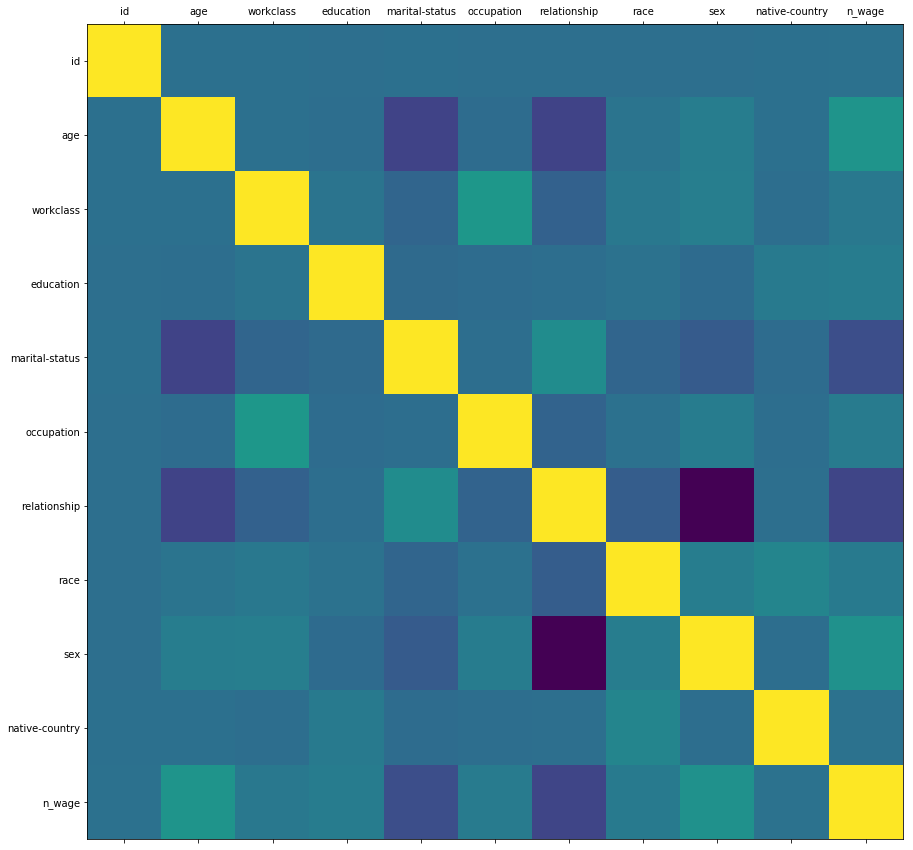

In [20]:
plot_correlation(temp)

In [26]:
all_data
print (all_data[['native-country','n_wage']].groupby(['native-country']).mean().sort_values(by='n_wage',ascending=False))

                              n_wage
native-country                      
Iran                        0.418605
France                      0.413793
India                       0.400000
Taiwan                      0.392157
Japan                       0.387097
Yugoslavia                  0.375000
Cambodia                    0.368421
Italy                       0.342466
England                     0.333333
Canada                      0.322314
Germany                     0.321168
Philippines                 0.308081
Hong                        0.300000
Greece                      0.275862
China                       0.266667
Cuba                        0.263158
?                           0.250429
Scotland                    0.250000
United-States               0.245843
Hungary                     0.230769
Ireland                     0.208333
South                       0.200000
Poland                      0.200000
Thailand                    0.166667
Ecuador                     0.142857
J

In [28]:
print (all_data.shape)
all_data['native-country'] = all_data['native-country'].replace(' ?',np.nan)
all_data['workclass'] = all_data['workclass'].replace(' ?',np.nan)
all_data['occupation'] = all_data['occupation'].replace(' ?',np.nan)

all_data.dropna(how='any',inplace=True)

print (all_data.shape)
print (all_data.head(10))

(32560, 17)
(32560, 17)
   id  age         workclass  fnlwgt     education education-num  \
0   1   50  Self-emp-not-inc   83311     Bachelors            13   
1   2   38           Private  215646       HS-grad             9   
2   3   53           Private  234721          11th             7   
3   4   28           Private  338409     Bachelors            13   
4   5   37           Private  284582       Masters            14   
5   6   49           Private  160187           9th             5   
6   7   52  Self-emp-not-inc  209642       HS-grad             9   
7   8   31           Private   45781       Masters            14   
8   9   42           Private  159449     Bachelors            13   
9  10   37           Private  280464  Some-college            10   

          marital-status         occupation   relationship   race     sex  \
0     Married-civ-spouse    Exec-managerial        Husband  White    Male   
1               Divorced  Handlers-cleaners  Not-in-family  White    Male

In [ ]:
x= all_data['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [ ]:
df[['relationship','wage']].groupby(['relationship']).mean()